In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import datasets

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE)

TEST_SIZE = 0.2
NOISE = 0.2
EPOCHS = 100
ALPHA = 0.1     # learning rate
N_SAMPLES = 1000

# Parmeters for matplotlib
params = { 'legend.fontsize' : 'large',
          'figure.figsize': (15,8),
          'axes.labelsize': 'large',
          'axes.titlesize': 'large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'large'
}

plt.rcParams.update(params)
CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')      # plt.style.use('ggplot')

In [3]:
# upload the dataset:

X,y = datasets.make_moons(n_samples = N_SAMPLES,
                         shuffle = True,
                         noise = NOISE,
                         random_state= RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

# visualization ####################


In [4]:
# create new df => data_df with X as (A,B) and  y =(target)

data_df = pd.DataFrame(X, columns = ['A','B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='target'>

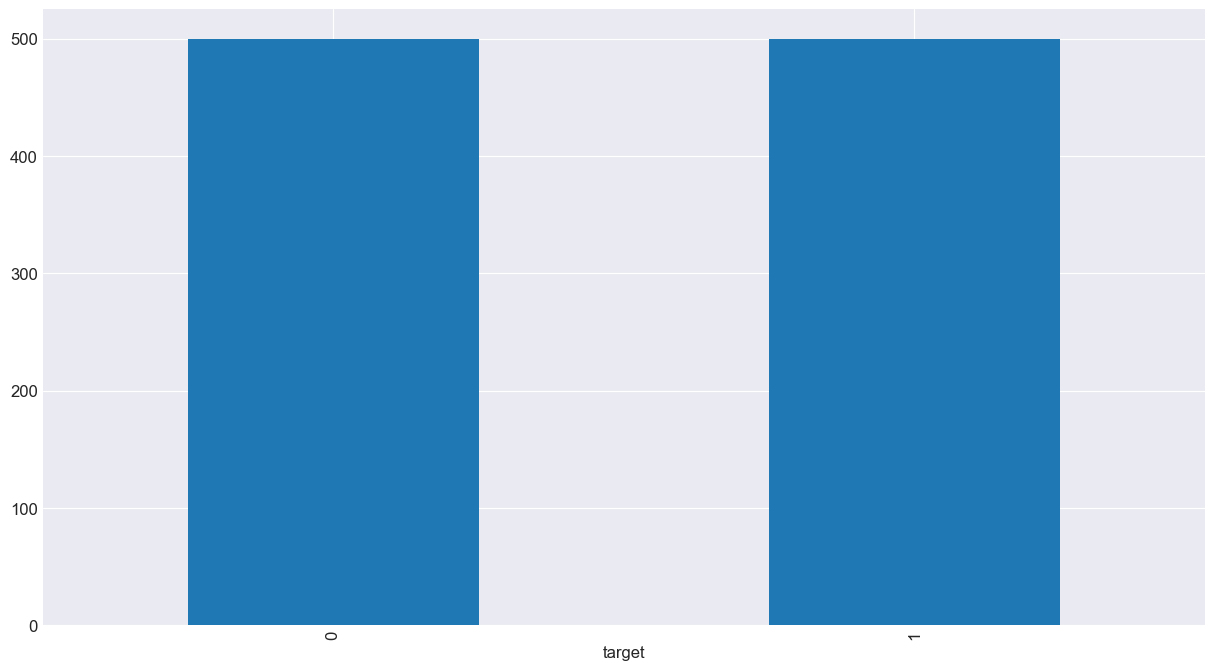

In [8]:
data_df['target'].value_counts().plot(ax = plt.subplot(), kind= 'bar')

<Axes: xlabel='A', ylabel='B'>

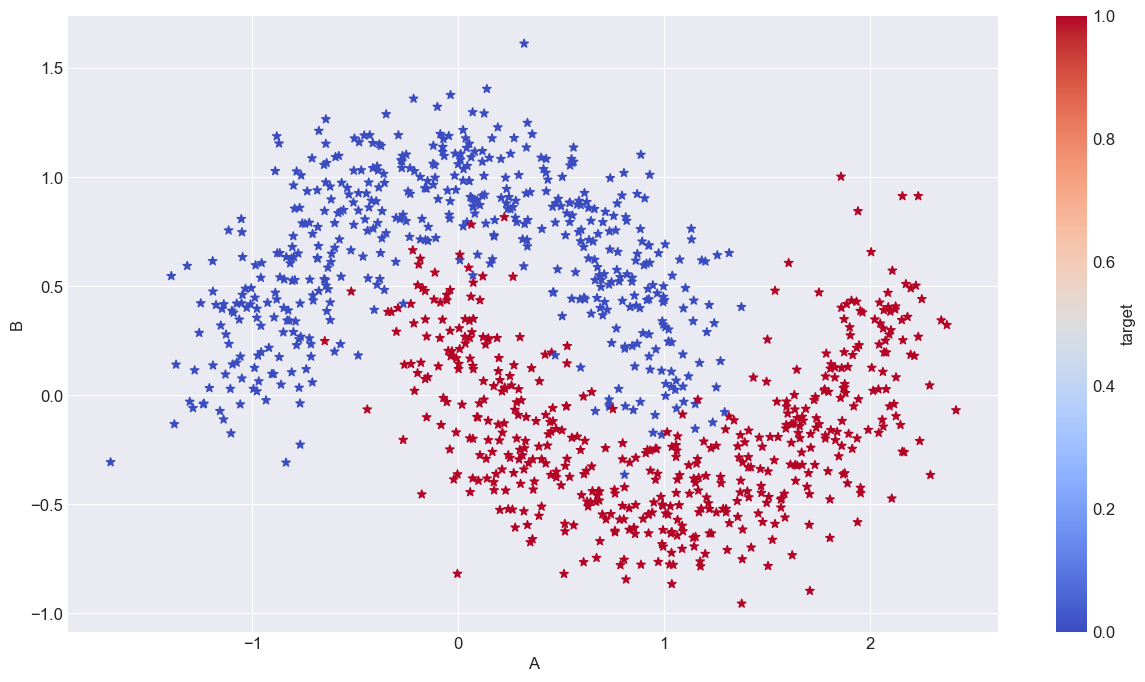

In [9]:
# scatterplot:

data_df.plot.scatter('A','B',   # col to plot
                     s = 40,    # size of the marker
                     marker= "*",  # type of marker
                     c = "target",  #color as per target col
                     cmap = CMAP)  # using colormap

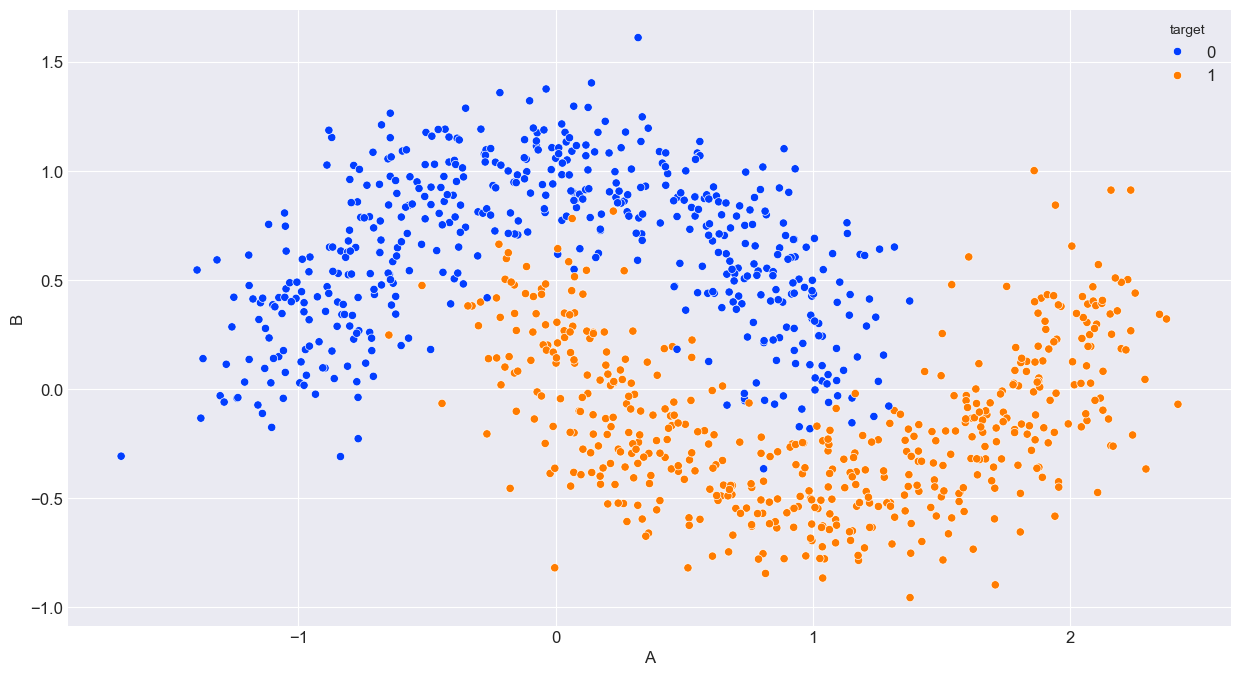

In [10]:
# using seaborn

ax = sns.scatterplot(data =  data_df,  # data from df
                     x = 'A', y = 'B',  # X axis and y axis col
                     palette = sns.color_palette("bright", 2),  # color map
                     hue = 'target')    # color as per target col

In [11]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]
data_train, data_test 

(array([[ 0.90633951,  0.90267624,  0.        ],
        [-1.11536828,  0.75579289,  0.        ],
        [ 1.88769158,  0.4175967 ,  1.        ],
        ...,
        [ 0.81249096, -0.05083979,  0.        ],
        [ 0.86329816,  0.61714755,  0.        ],
        [ 2.0966594 , -0.05107625,  1.        ]]),
 array([[ 1.64736053e+00, -1.04936773e-01,  1.00000000e+00],
        [-5.57157270e-01,  8.48979322e-01,  0.00000000e+00],
        [ 1.15826488e+00, -3.13160503e-01,  1.00000000e+00],
        [-6.41910461e-01,  5.02392502e-01,  0.00000000e+00],
        [ 6.80605978e-01, -4.40831773e-01,  1.00000000e+00],
        [-7.47188958e-02,  1.13818507e+00,  0.00000000e+00],
        [ 8.27453572e-03,  6.44331166e-01,  1.00000000e+00],
        [ 1.06150138e-01, -2.74850288e-01,  1.00000000e+00],
        [ 1.12037561e+00, -3.20948283e-01,  1.00000000e+00],
        [-4.40351436e-01,  7.53554921e-01,  0.00000000e+00],
        [-8.26001350e-02, -1.36553707e-01,  1.00000000e+00],
        [-7.67745712

In [12]:
data_train.shape, data_test.shape

((900, 3), (100, 3))

In [13]:
type(data_train)

numpy.ndarray

In [14]:
# apply one hot encoding

y = pd.get_dummies(y).to_numpy() #Conveting to one-hot encoding
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [15]:
y.shape

(1000, 2)

In [16]:
# apply train test:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size= TEST_SIZE,
                                                   random_state= RANDOM_STATE)

In [17]:
X_train

array([[ 1.09250812,  0.03964548],
       [ 1.34038135, -0.11491831],
       [-0.03900763,  0.29525095],
       ...,
       [ 0.32070311,  1.61207468],
       [-0.27040491,  1.09739536],
       [ 0.99647506, -0.69413084]])

In [18]:
X_test

array([[ 0.28416546, -0.03245601],
       [ 0.83577695,  0.40444099],
       [-0.76774571,  0.42056191],
       [ 0.35060743, -0.67383946],
       [ 0.2772646 , -0.60668728],
       [ 0.51440752, -0.81897254],
       [ 1.80672388, -0.47751782],
       [ 0.98513638, -0.46601521],
       [ 1.94091811, -0.58212819],
       [ 0.36265223, -0.29404275],
       [-0.64809084,  0.24836959],
       [ 1.03130662, -0.50879449],
       [-0.46216182,  0.63544104],
       [ 0.86329816,  0.61714755],
       [-0.30160375,  0.81321935],
       [-0.77300678,  0.25656079],
       [ 0.61687009,  0.43999205],
       [ 0.29597711, -0.29416439],
       [-0.64263562,  1.15296129],
       [ 1.94527292, -0.01836546],
       [-0.88819717,  0.47009179],
       [ 1.9171034 ,  0.18420051],
       [-0.95690251,  0.19756463],
       [ 0.92785941,  0.68703367],
       [ 2.06549771, -0.1437958 ],
       [ 0.12914397,  0.91900708],
       [ 1.91483018, -0.24584629],
       [ 1.43451789,  0.08120139],
       [-1.39362818,

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

shape of input is frozen i.e. same as number of features. 
shape of output is also frozen i.e. same as number of outputs. 
In hidden layer you can add as many no of neurons you want. 
bias seats on the top of each neuron

In [20]:
# first activation function => tanh

def fn_activ(z):
    return np.tanh(z)
 
# to change the range from (-inf), (+inf) to (-1,+1) using tanh
def fn_activ_prime(a):
    return 1-np.tanh(a)**2   # derivative of tanh


In [21]:
# as we are dealing with multiple class (y)==> use softmax
# second activation function = > softmax

def fn_softmax(z):
    
    # calc softmax => (e^z) / (summation of e^z)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis =1, keepdims = True)

In [22]:
sm = fn_softmax(np.asarray([[8,5,0], [-10,0,10]]))
sm.sum(axis = 1, keepdims = True)   

array([[1.],
       [1.]])

In [23]:
sm.sum(axis =1)

array([1., 1.])

In [24]:
sm.sum(axis =1, keepdims = True).shape

(2, 1)

###### Forward Propogation ######

In [25]:
def predict(model, X_p):
    
# store weight and bias in the model

    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']

    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']
    
    # for layer 1
    
    z1 = X_p.dot(W1) + b1   # Aggregation z = X.W + b
    a1 = fn_activ(z1)       # Activation a = g(z)

   
    # for layer 2:
    
    z2 = a1.dot(W2) + b2
    a2 = fn_activ(z2)
    
    # for layer 3:
    
    z3 = a2.dot(W3) +b3
    a3 = fn_activ(z3)
    
    # for layer 4:
    
    z4 = z3.dot(W4)+b4
    a4 = fn_activ(z4)
    
    # for layer 5:   (Different activation function -> softmax)
    
    z5 = a4.dot(W5) + b5
    a5 = fn_softmax(z5)
    
    return np.argmax(a5, axis = 1)  #pick index of class with highest probability   
    # argmax gives us probability

In [26]:
# as we are taking w and b random;y => error
# calc loss

def calculate_loss(model, X_l, y_l):
    
    W1 = model['W1']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    
    b1 = model['b1']
    b2 = model['b2']
    b3 = model['b3']
    b4 = model['b4']
    b5 = model['b5']
    
    m = X_l.shape[0]
    
    # forward propagation
    
    # layer 1
    
    z1 = X_l.dot(W1) + b1    # Aggregation z = X.W + b
    a1 = fn_activ(z1)        # Activation a = g(z)
    
    # for layer 2:
    
    z2 = a1.dot(W2) + b2
    a2 = fn_activ(z2)
    
    # for layer 3:
    
    z3 = a2.dot(W3) +b3
    a3 = fn_activ(z3)
    
    # for layer 4:
    
    z4 = z3.dot(W4)+b4
    a4 = fn_activ(z4)
    
    # for layer 5:   (Different activation function -> softmax)
    
    z5 = a4.dot(W5) + b5
    a5 = fn_softmax(z5)
    
    #calculating losses along each sample
    # loss = -[y * log(a) + (1-y) *log(1-a)]
    data_loss = -(y_l *np.log(a5) + (1 - y_l) * np.log(1-a5)).sum()
    
    return data_loss / m

In [27]:
param = {}
param['nn_dim'] = [X_train.shape[1], 5,5,4,3]  # node sum

In [28]:
#we dont know the weights so building the model 

def build_model(param, X_tr, y_tr, nn_out, alpha=ALPHA, epochs=EPOCHS):
   
    m = X_tr.shape[0]
    nn_output_dim = nn_out

    # Hidden Layers

    #Layer 1
    # size = 2, 5
    W1 = np.random.rand(param['nn_dim'][0], param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])

    # size = 5
    b1 = np.zeros((1, param['nn_dim'][1]), dtype = np.float32)

    ###################################################################################

    #Layer 2
    # size = 5, 5
    W2 = np.random.rand(param['nn_dim'][1], param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])

    # size = 5
    b2 = np.zeros((1, param['nn_dim'][2]), dtype = np.float32)

    ###################################################################################
    
    #Layer 3
    # size = 5, 4
    W3 = np.random.rand(param['nn_dim'][2], param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])

    # size = 5
    b3 = np.zeros((1, param['nn_dim'][3]), dtype = np.float32)

    ###################################################################################

    #Layer 4
    # size = 4, 3
    W4 = np.random.rand(param['nn_dim'][3], param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])

    # size = 3
    b4 = np.zeros((1, param['nn_dim'][4]), dtype = np.float32)

    ###################################################################################

    #Layer 5
    # size = 3, 2
    W5 = np.random.rand(param['nn_dim'][4], nn_output_dim) / np.sqrt(param['nn_dim'][4])

    # size = 2
    b5 = np.zeros((1, nn_output_dim), dtype = np.float32)

    ###################################################################################
    

    curr_loss = 0

    loss, epoch = [] , []

    for i  in range (0, epochs):

        
        # forward propagation 
        # Layer 1 
        z1 = X_tr.dot(W1) + b1  # Aggregation z = X.W + b
        a1 = fn_activ(z1)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 2
        z2 = a1.dot(W2) + b2    # Aggregation z = X.W + b
        a2 = fn_activ(z2)       # Activation a = g(z)

        ##################################################################################
        
        # Layer 3
        z3 = a2.dot(W3) + b3    # Aggregation z = X.W + b
        a3 = fn_activ(z3)       # Activation a = g(z)

        ##################################################################################

        # Layer 4
        z4 = a3.dot(W4) + b4    # Aggregation z = X.W + b
        a4 = fn_activ(z4)       # Activation a = g(z)

        ##################################################################################
    
        # Layer 5  (Different activation function -> softmax)
        z5 = a4.dot(W5) + b5
        a5 = fn_softmax(z5) 

        #################################################################################
        ##################################################################################


        #back propogation

        #Layer 5
        assert(a5.shape== y_tr.shape), f'check y {a5.shape}/{y_tr.shape}'
        dz5 = a5 - y_tr #remember dimention of a2 and y to be same

        dW5 = (a4.T).dot(dz5)
        assert (W5.shape == dW5.shape), f'check W2 {W5.shape}/{dW5.shape}'

        db5 = np.sum(dz5, axis = 0, keepdims=True)
        assert (b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)  
        assert (a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        ##############################################################################
        
        # Layer 4
        
        dz4 = da4 * fn_activ_prime(z4)  
        assert (z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'

        dW4 = (a3.T).dot(dz4)   
        assert (W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'

        db4 = np.sum(dz4, axis=0, keepdims=True)
        assert (b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)  
        assert (a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'

        ################################################################################

        # Layer 3
        
        dz3 = da3 * fn_activ_prime(z3)  
        assert (z3.shape == dz3.shape), f'check z3 {z3.shape}/{dz3.shape}'

        dW3 = (a2.T).dot(dz3)    # dw = a.dz
        assert (W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'

        db3 = np.sum(dz3, axis=0, keepdims=True)
        assert (b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'

        da2 = dz3.dot(W3.T)  # da = W.dz
        assert (a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'

        ################################################################################

        # Layer 2
        
        dz2 = da2 * fn_activ_prime(z2)  
        assert (z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'

        dW2 = (a1.T).dot(dz2)   
        assert (W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)  
        assert (a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        ################################################################################

        # Layer 1
        
        dz1 = da1 * fn_activ_prime(z1)  
        assert (z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'

        dW1 = (X_tr.T).dot(dz1)    # dw = a.dz
        assert (W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'

        #Gradient Update
        W1 += - alpha * dW1 / m  
        b1 += - alpha * db1 / m 
        W2 += - alpha * dW2 / m 
        b2 += - alpha * db2 / m 
        W3 += - alpha * dW3 / m  
        b3 += - alpha * db3 / m 
        W4 += - alpha * dW4 / m 
        b4 += - alpha * db4 / m
        W5 += - alpha * dW5 / m 
        b5 += - alpha * db5 / m
        

        # Saving weights and biases in dict to use in other functions
        
        model = 
                { 'W1' : W1, 'b1' : b1,
                  'W2' : W2, 'b2' : b2,
                  'W3' : W3, 'b3' : b3,
                  'W4' : W4, 'b4' : b4,
                  'W5' : W5, 'b5' : b5
                }
   
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        # printing current loss calculated
        
        if i % 100 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')
        
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    return model

In [30]:
nn_out_dim = 2

model = build_model(param, X_train, y_train, nn_out_dim)

model

After epoch:   0; loss:  1.39963


NameError: name 'loss_hist' is not defined

In [ ]:
np.random.rand(data_train.shape[1]) #w0, w1, w2
#Z = x*w + b
#Z = weights[0]

In [ ]:
X = X_train
fig, ax = plt.subplots() #instantiation of plt object
dm = 0.005  #spacing of the grid 
x_min, x_max = X[:,0].min() - 0.05 ,  X[:,0].max() + 0.05
y_min, y_max = X[:,1].min() - 0.05 ,  X[:,1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, dm), 
                     np.arange(y_min, y_max, dm))  #generating a mesh

XX = np.c_[xx.ravel(), yy.ravel()]  #prepare feature data

#prediction = predict(model, XX)
#y_pred = prediction.argmax(axis=1)
y_pred = predict(model, XX)

Z = np.array(y_pred).reshape(xx.shape)


#ploting decision boundary
ax.contourf(xx, yy, Z, cmap=CMAP, alpha=0.8)
ax.scatter(X[:,0], X[:,1], c= y_train.argmax(axis=1) , edgecolors='k', cmap=plt.cm.bwr)

In [ ]:
xx.shape,yy.shape

In [ ]:
y_pred = predict(model, X_test)
accuracy_score(y_test.argmax(axis=1), y_pred)

In [ ]:
y_pred = predict(model, X_test)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
cm

In [ ]:
y_pred = predict(model, X_train)
accuracy_score(y_train.argmax(axis=1), y_pred)

In [ ]:
y_pred = predict(model, X_train)
cm = confusion_matrix(y_train.argmax(axis=1), y_pred)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=[0,1])
fig, ax = plt.subplots(figure=(6,6))
disp.plot(ax = ax, cmap='Blues', colorbar=False);
ax.grid(False);